In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'image.cmap': 'coolwarm'})

from numba import jit,prange

import time
import os

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
def remove_triangle(df):
    # Remove triangle of a symmetric matrix and the diagonal
    
    df = df.astype(float)
    df.values[np.triu_indices_from(df, k=1)] = np.nan
    df  = (df.values.reshape((1,(df.shape[0])**2)))
    df = df[~np.isnan(df)]
    df = df[df!=1]
    return (df).reshape((1,len(df)))

# Ingestion

In [3]:
path = r'/Users/rodrigo/Post-Grad/CC400/ADHD200_CC400_TCs_filtfix'

phenotypic = pd.DataFrame()
files = os.listdir(path)
files.sort()

df = pd.DataFrame()
#phenotypic = pd.DataFrame(index=pd.MultiIndex.from_tuples([(,'Subject')], names=['Institution', 'Subject']))

cont = 0


# Dataset LOOP
for dataset in files[1:]:
    print(dataset)
    path = r'/Users/rodrigo/Post-Grad/CC400/ADHD200_CC400_TCs_filtfix'
    path = os.path.join(path,dataset)
    files = os.listdir(path)
    files.sort()
    start = time.time()
    
    # Subject LOOP
    for subject in files[1:]:
        #print(subject)
        
        # Saving phenotypic data
        if str(subject)[-3:] == 'csv':
            if str(subject)[-14:] == 'phenotypic.csv':
                df_aux = pd.read_csv(os.path.join(path,subject))
                df_aux[subject[:-15]] = str(subject[:-15])
                df_aux = df_aux.set_index([subject[:-15],'ScanDir ID'], inplace=False)
                phenotypic = pd.concat([df_aux,phenotypic], ignore_index=False)
            
        # Saving run/subject data (Try xARRAY)
        
        else:
            # Run LOOP
            for run in os.listdir(os.path.join(path,subject)):
                #print(run)
                tuples = [(dataset,subject,run)]
                teste = pd.read_csv(str(os.path.join(path,subject)) + '/' + run, sep='\t')
                #print(teste.shape)
                if teste.shape[0] != 0:
                    # df = pd.concat([df, pd.DataFrame(((teste.corr(method='pearson')).values).reshape((1,351*351)),
                    #                      index=pd.MultiIndex.from_tuples(tuples, names=['Institution', 'Subject', 'Run']))])
                    df = pd.concat([df, pd.DataFrame((remove_triangle(teste.corr(method='pearson'))),
                                         index=pd.MultiIndex.from_tuples(tuples, names=['Institution', 'Subject', 'Run']))])
    cont += 1

    end = time.time()
    print((len(files[1:]) - cont)*(end - start)/60)
    
phenotypic.index.names=['Institution','Subject']
phenotypic.to_csv(r'/Users/rodrigo/Post-Grad/CC400/ADHD200_CC400_TCs_filtfix/phenotypic.csv', header=True)
df.to_csv(r'/Users/rodrigo/Post-Grad/CC400/ADHD200_CC400_TCs_filtfix/corr_matrices.csv', header=True)

KKI
9.75030026435852
NYU
266.7245721022288
NeuroIMAGE
10.378380513191223
OHSU
80.63714226086934
Peking_1
53.686594820022584
Peking_2
27.604052619139352
Peking_3
10.313731690247854
Pittsburgh
51.50743947029114
WashU
51.1369010925293
corr_matrices.csv


NotADirectoryError: [Errno 20] Not a directory: '/Users/rodrigo/Post-Grad/CC400/ADHD200_CC400_TCs_filtfix/corr_matrices.csv'

https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html

In [22]:
#phenotypic.to_csv (r'/Users/rodrigo/Post-Grad/CC400/ADHD200_CC400_TCs_filtfix/phenotypic.csv', header=True)

In [23]:
#df.to_csv (r'/Users/rodrigo/Post-Grad/CC400/ADHD200_CC400_TCs_filtfix/corr_matrices.csv', header=True)

## Validation 

In [20]:
data = pd.read_csv(r'/Users/rodrigo/Post-Grad/CC400/ADHD200_CC400_TCs_filtfix/corr_matrices.csv',index_col=['Institution','Subject'])

In [21]:
data

Run         0  \
Institution Subject                                                            
KKI         1018959   snwmrda1018959_session_1_rest_1_cc400_TCs.1D -0.357395   
            1018959  sfnwmrda1018959_session_1_rest_1_cc400_TCs.1D -0.404978   
            1019436  sfnwmrda1019436_session_1_rest_1_cc400_TCs.1D -0.037248   
            1019436   snwmrda1019436_session_1_rest_1_cc400_TCs.1D -0.042442   
            1043241  sfnwmrda1043241_session_1_rest_1_cc400_TCs.1D -0.145595   
...                                                            ...       ...   
NYU         10011    sfnwmrda0010011_session_1_rest_2_cc400_TCs.1D -0.064436   
            10011     snwmrda0010011_session_1_rest_2_cc400_TCs.1D -0.101337   
            10011     snwmrda0010011_session_1_rest_1_cc400_TCs.1D -0.115658   
            10011    sfnwmrda0010011_session_1_rest_1_cc400_TCs.1D -0.075963   
            10012     snwmrda0010012_session_1_rest_1_cc400_TCs.1D  0.060246   

                            1         2         3         4         5  \
Institution Subject                                                     
KKI         1018959  0.227763 -0.251423 -0.332295 -0.102970  0.125275   
            1018959  0.262990 -0.216877 -0.477841  0.000661  0.186136   
            1019436 -0.017628 -0.291444 -0.134596 -0.404498 -0.025499   
            1019436 -0.095684 -0.147402 -0.139512 -0.281351  0.053754   
            1043241 -0.055954 -0.075459 -0.301416  0.033625  0.274396   
...                       ...       ...       ...       ...       ...   
NYU         10011   -0.111524 -0.035624  0.015234 -0.363275 -0.140104   
            10011    0.105570 -0.156421  0.009413 -0.356612 -0.181716   
            10011   -0.155344 -0.033836  0.184936  0.027199 -0.196992   
            10011   -0.188936 -0.095511  0.118938  0.053775 -0.249147   
            10012    0.313226 -0.037117 -0.085921  0.027380  0.004990   

                            6         7         8  ...     61415     61416  \
Institution Subject                                ...                       
KKI         1018959 -0.246257 -0.021564 -0.300647  ...  0.148608  0.072116   
            1018959 -0.230924  0.045067 -0.442252  ... -0.050274  0.067311   
            1019436 -0.263412  0.318844 -0.311113  ... -0.363508 -0.163221   
            1019436 -0.138527  0.193280 -0.254099  ... -0.221602 -0.143568   
            1043241  0.067386  0.203873  0.099673  ... -0.099430 -0.097168   
...                       ...       ...       ...  ...       ...       ...   
NYU         10011   -0.065827  0.053079  0.053701  ...  0.101872  0.225275   
            10011    0.083884  0.103327  0.062887  ... -0.027390  0.113434   
            10011   -0.071348 -0.141632  0.028110  ... -0.019580 -0.036582   
            10011   -0.123554 -0.283692  0.077583  ...       NaN       NaN   
            10012   -0.060252  0.277212 -0.145165  ... -0.040810 -0.005049   

                        61417     61418     61419     61420     61421  \
Institution Subject                                                     
KKI         1018959  0.024334 -0.070126 -0.176028  0.327480 -0.061142   
            1018959 -0.013653 -0.043657 -0.081521  0.372736 -0.225724   
            1019436 -0.088574 -0.319499  0.012358  0.133251 -0.210936   
            1019436 -0.029375 -0.148375  0.108517  0.047048 -0.307595   
            1043241  0.016946 -0.109942  0.132351  0.270211 -0.193758   
...                       ...       ...       ...       ...       ...   
NYU         10011    0.288223  0.094400  0.202226  0.065948  0.003897   
            10011    0.261866 -0.025704  0.101818  0.029067  0.047631   
            10011   -0.003868  0.042820  0.080829  0.116129 -0.195072   
            10011         NaN       NaN       NaN       NaN       NaN   
            10012   -0.115974  0.226102 -0.020277 -0.039847 -0.360926   

                        61422     61423     61424  
Institution Subject                                
KKI

In [15]:
phenotypic

Site  Gender    Age  Handedness  DX   Secondary Dx   \
KKI ScanDir ID                                                        
KKI 1018959        3       0  12.36           1   0             NaN   
    1019436        3       1  12.98           1   3             NaN   
    1043241        3       1   9.12           1   0             NaN   
    1266183        3       0   9.67           1   0             NaN   
    1535233        3       1   9.64           0   0             NaN   
...              ...     ...    ...         ...  ..             ...   
    8337695        3       1   8.80           1   1             ODD   
    8432725        3       0  11.51           1   0   Simple Phobia   
    8628223        3       0  10.81           1   0   Simple phobia   
    8658218        3       1   9.75           1   0  Simple Phobia    
    9922944        3       1  10.30           1   0             NaN   

                ADHD Measure  ADHD Index  Inattentive  Hyper/Impulsive  ...  \
KKI ScanDir ID                                                          ...   
KKI 1018959                2          44           47               44  ...   
    1019436                2          71           60               66  ...   
    1043241                2          40           40               43  ...   
    1266183                2          47           44               43  ...   
    1535233                2          42           41               43  ...   
...                      ...         ...          ...              ...  ...   
    8337695                2          71           74               82  ...   
    8432725                2        -999         -999             -999  ...   
    8628223                2          42           49               49  ...   
    8658218                2          56           55               52  ...   
    9922944                2          49           50               54  ...   

                Performance IQ  Full2 IQ  Full4 IQ  Med Status  QC_Rest_1  \
KKI ScanDir ID                                                              
KKI 1018959                115       NaN       103           1          1   
    1019436                108       NaN       122           1          1   
    1043241                106       NaN       120           1          1   
    1266183                 96       NaN       120           1          1   
    1535233                135       NaN       122           1          1   
...                        ...       ...       ...         ...        ...   
    8337695                112       NaN        94           2          1   
    8432725                102       NaN       116           1          1   
    8628223                 86       NaN        97           1          1   
    8658218                115       NaN       114           1          0   
    9922944                110       NaN       109           1          1   

                QC_Rest_2  QC_Rest_3  QC_Rest_4  QC_Anatomical_1  \
KKI ScanDir ID                                                     
KKI 1018959           NaN        NaN        NaN                1   
    1019436           NaN        NaN        NaN                1   
    1043241           NaN        NaN        NaN                1   
    1266183           NaN        NaN        NaN                1   
    1535233           NaN        NaN        NaN                1   
...                   ...        ...        ...              ...   
    8337695           NaN        NaN        NaN                1   
    8432725           NaN        NaN        NaN                1   
    8628223           NaN        NaN        NaN                1   
    8658218           NaN        NaN        NaN                1   
    9922944           NaN        NaN        NaN                1   

                QC_Anatomical_2  
KKI ScanDir ID                   
KKI 1018959                 NaN  
    1019436                 NaN  
    1043241                 NaN  
    126

In [16]:
#df = df.dropna(axis=1)
df

0      \
Institution Subject Run                                                       
KKI         1018959 snwmrda1018959_session_1_rest_1_cc400_TCs.1D  -0.357395   
                    sfnwmrda1018959_session_1_rest_1_cc400_TCs.1D -0.404978   
            1019436 sfnwmrda1019436_session_1_rest_1_cc400_TCs.1D -0.037248   
                    snwmrda1019436_session_1_rest_1_cc400_TCs.1D  -0.042442   
            1043241 sfnwmrda1043241_session_1_rest_1_cc400_TCs.1D -0.145595   
...                                                                     ...   
NYU         0010011 sfnwmrda0010011_session_1_rest_2_cc400_TCs.1D -0.064436   
                    snwmrda0010011_session_1_rest_2_cc400_TCs.1D  -0.101337   
                    snwmrda0010011_session_1_rest_1_cc400_TCs.1D  -0.115658   
                    sfnwmrda0010011_session_1_rest_1_cc400_TCs.1D -0.075963   
            0010012 snwmrda0010012_session_1_rest_1_cc400_TCs.1D   0.060246   

                                                                      1      \
Institution Subject Run                                                       
KKI         1018959 snwmrda1018959_session_1_rest_1_cc400_TCs.1D   0.227763   
                    sfnwmrda1018959_session_1_rest_1_cc400_TCs.1D  0.262990   
            1019436 sfnwmrda1019436_session_1_rest_1_cc400_TCs.1D -0.017628   
                    snwmrda1019436_session_1_rest_1_cc400_TCs.1D  -0.095684   
            1043241 sfnwmrda1043241_session_1_rest_1_cc400_TCs.1D -0.055954   
...                                                                     ...   
NYU         0010011 sfnwmrda0010011_session_1_rest_2_cc400_TCs.1D -0.111524   
                    snwmrda0010011_session_1_rest_2_cc400_TCs.1D   0.105570   
                    snwmrda0010011_session_1_rest_1_cc400_TCs.1D  -0.155344   
                    sfnwmrda0010011_session_1_rest_1_cc400_TCs.1D -0.188936   
            0010012 snwmrda0010012_session_1_rest_1_cc400_TCs.1D   0.313226   

                                                                      2      \
Institution Subject Run                                                       
KKI         1018959 snwmrda1018959_session_1_rest_1_cc400_TCs.1D  -0.251423   
                    sfnwmrda1018959_session_1_rest_1_cc400_TCs.1D -0.216877   
            1019436 sfnwmrda1019436_session_1_rest_1_cc400_TCs.1D -0.291444   
                    snwmrda1019436_session_1_rest_1_cc400_TCs.1D  -0.147402   
            1043241 sfnwmrda1043241_session_1_rest_1_cc400_TCs.1D -0.075459   
...                                                                     ...   
NYU         0010011 sfnwmrda0010011_session_1_rest_2_cc400_TCs.1D -0.035624   
                    snwmrda0010011_session_1_rest_2_cc400_TCs.1D  -0.156421   
                    snwmrda0010011_session_1_rest_1_cc400_TCs.1D  -0.033836   
                    sfnwmrda0010011_session_1_rest_1_cc400_TCs.1D -0.095511   
            0010012 snwmrda0010012_session_1_rest_1_cc400_TCs.1D  -0.037117   

                                                                      3      \
Institution Subject Run                                                       
KKI         1018959 snwmrda1018959_session_1_rest_1_cc400_TCs.1D  -0.332295   
                    sfnwmrda1018959_session_1_rest_1_cc400_TCs.1D -0.477841   
            1019436 sfnwmrda1019436_session_1_rest_1_cc400_TCs.1D -0.134596   
                    snwmrda1019436_session_1_rest_1_cc400_TCs.1D  -0.139512   
            1043241 sfnwmrda1043241_session_1_rest_1_cc400_TCs.1D -0.301416   
...                                                                     ...   
NYU         0010011 sfnwmrda0010011_session_1_rest_2_cc400_TCs.1D  0.015234   
                    snwmrda0010011_session_1_rest_2_cc400_TCs.1D   0.009413   
                    snwmrda0010011_session_1_rest_1_cc400_TCs.1D   0.184936   
                    sfnwmrda0010011_session_1_rest_1_cc400_TCs.1D  0.118938   
            0010012 snwmrda0010012_ses

# Correlation matrix

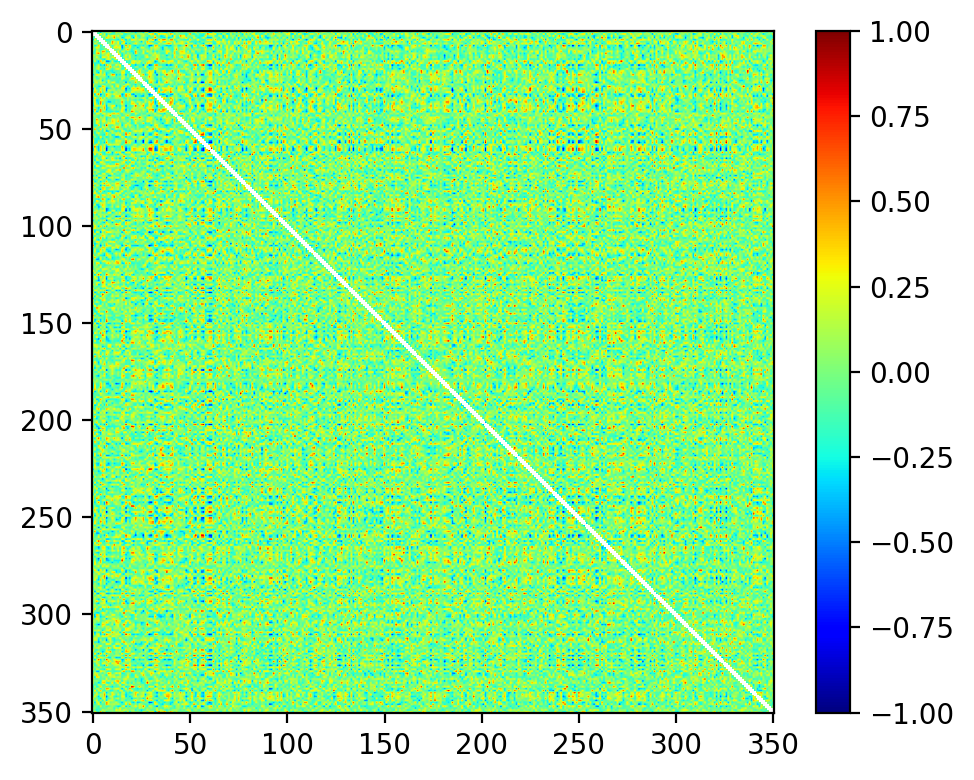

In [227]:
plt.figure(dpi=200)
im = plt.imshow((df.iloc[2].values).reshape((351,351)), cmap='jet')
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(-1,1)
plt.tight_layout()
plt.savefig("connectivity_matrix_sample.png", dpi=200)

### Correlation distribution

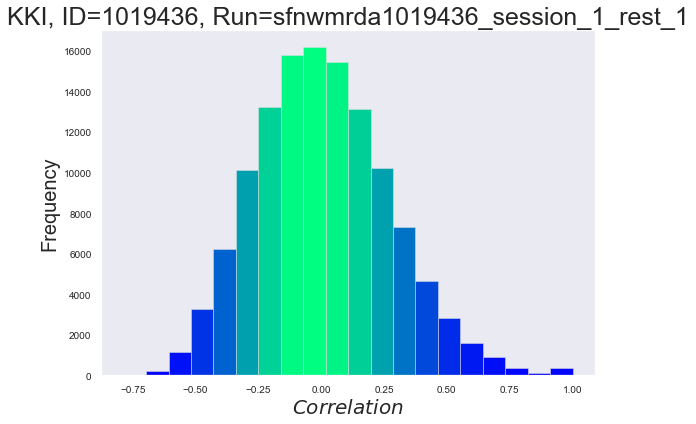

In [50]:
plt.figure(figsize=(8,6))
bins = 20
n, bins, patches = plt.hist((df.iloc[2].values),bins=bins, facecolor='#2ab0ff',edgecolor='#e0e0e0',linewidth=0.5)

n = n.astype('int') # it MUST be integer

# Good old loop. Choose colormap of your taste
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.winter(n[i]/max(n)))


plt.title("{}, ID={}, Run={}".format(df.iloc[2].name[0], df.iloc[2].name[1],df.iloc[2].name[2][:32]),fontsize=25)
plt.xlabel(r"$Correlation $")
plt.ylabel("Frequency")
plt.tight_layout()
plt.grid()
plt.savefig("Sample_hist.png", dpi=200)

# EDA

In [67]:
phenotypic.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 715 entries, ('Pittsburgh', 16058) to ('KKI', 9922944)
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Site             715 non-null    int64  
 1   Gender           714 non-null    float64
 2   Age              715 non-null    float64
 3   Handedness       714 non-null    float64
 4   DX               715 non-null    int64  
 5   Secondary Dx     121 non-null    object 
 6   ADHD Measure     578 non-null    float64
 7   ADHD Index       499 non-null    float64
 8   Inattentive      578 non-null    float64
 9   Hyper/Impulsive  578 non-null    float64
 10  IQ Measure       667 non-null    float64
 11  Verbal IQ        588 non-null    float64
 12  Performance IQ   588 non-null    float64
 13  Full2 IQ         89 non-null     float64
 14  Full4 IQ         667 non-null    float64
 15  Med Status       578 non-null    float64
 16  QC_Rest_1        709 non-null

#### Gender distribution

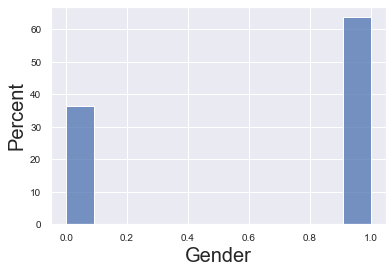

In [89]:
sns.histplot(data=phenotypic, x='Gender',stat='percent')

plt.show()

#### Age distribution

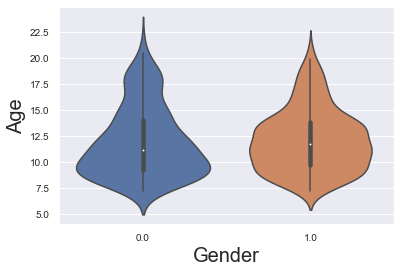

In [88]:
sns.violinplot(data=phenotypic, y='Age',x='Gender',stat='percent')
plt.show()

#### ADHD 

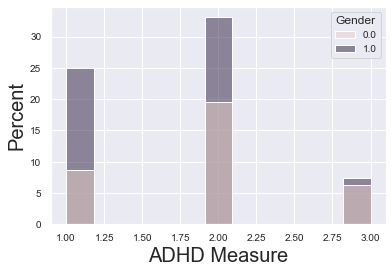

In [72]:
sns.histplot(data=phenotypic, x='ADHD Measure'  , stat='percent', hue='Gender')
plt.show()

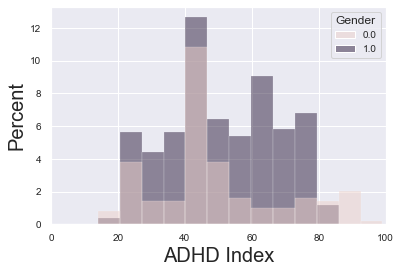

In [61]:
sns.histplot(data=phenotypic, x='ADHD Index'  , stat='percent', hue='Gender')

plt.xlim(0,100)
plt.show()

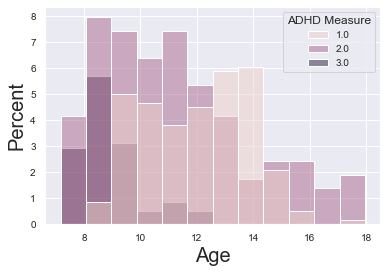

In [75]:
sns.histplot(data=phenotypic, x='Age'  , stat='percent', hue='ADHD Measure')
plt.show()

We must verify if the model is indeed identifying AGE or ADHD Measure

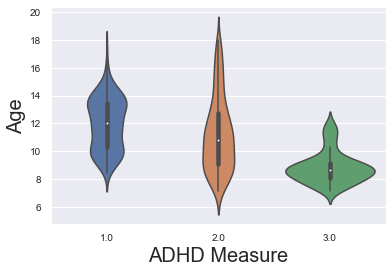

In [94]:
sns.violinplot(data=phenotypic, y='Age',x='ADHD Measure'  , stat='percent')
plt.show()

#### Quality check

In [43]:
phenotypic['QC_Rest_1'].value_counts()

 1.0      609
 0.0       89
-999.0     11
Name: QC_Rest_1, dtype: int64

In [45]:
phenotypic['QC_Anatomical_1'].value_counts()

 1.0      671
 0.0       32
-999.0     11
Name: QC_Anatomical_1, dtype: int64